# Primero dar acceso a colab para que acceda a los archivos de Google drive
# Luego, elegir una carpeta y subir el dataframe a drive

In [1]:
# Poner la ruta donde se encuentra el dataframe proveniente del scraping

%cd '/content/drive/MyDrive/notas analytics/sentiment analysis with python'

/content/drive/MyDrive/notas analytics/sentiment analysis python datacamp


In [3]:
# Verificar que el archivo se encuentra en la ruta

!ls

amazon_reviews_sample.csv  IMDB_sample.csv	    zoom_reviews.ipynb
bcp_app_reviews.ipynb	   sentiment_project.ipynb  zoom_reviews.xlsx
bcp_app_reviews.xlsx	   Tweets.csv


In [5]:
import pandas as pd

df = pd.read_excel('zoom_reviews.xlsx')
df.head()

,comentario,fecha,likes
0,Es una aplicación muy buena en estos tiempos ...,"December 28, 2021",43
1,Deberían de optimizar más la interfaz para mó...,"January 4, 2022",14
2,Muy bueno pero los anuncios interfieren muchí...,"December 29, 2021",38
3,Ha sido de mucha ayuda. Pienso que en muchos ...,"December 4, 2021",128
4,Me gusta la calidad de fotos. Pero hay una di...,"November 23, 2021",91


In [6]:
df.describe()

,likes
count,520.000000
mean,60.517308
std,168.450137
min,0.000000
25%,4.000000
50%,13.000000
75%,53.000000
max,2859.000000


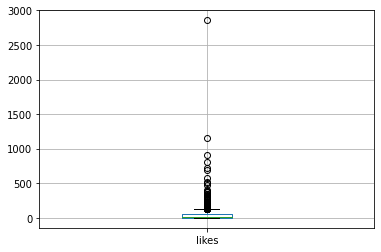

In [7]:
import numpy as np
import matplotlib.pyplot as plt

boxplot = df.boxplot(column=['likes'])

In [8]:
import re

def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

def find_text(text):
    num = re.findall(r'[a-zA-Z ]+',text)
    return " ".join(num)


df_bcp[['mes','año']] = df_bcp['fecha'].str.split(",",expand=True)


df['año']=df['año'].apply(lambda x: find_number(x))

df['mes']=df['mes'].apply(lambda x: find_text(x))



In [9]:
df.head()

,comentario,fecha,likes,mes,año
0,Es una aplicación muy buena en estos tiempos ...,"December 28, 2021",43,December,2021
1,Deberían de optimizar más la interfaz para mó...,"January 4, 2022",14,January,2022
2,Muy bueno pero los anuncios interfieren muchí...,"December 29, 2021",38,December,2021
3,Ha sido de mucha ayuda. Pienso que en muchos ...,"December 4, 2021",128,December,2021
4,Me gusta la calidad de fotos. Pero hay una di...,"November 23, 2021",91,November,2021


In [10]:
df.año.value_counts()

2021    452
2022     68
Name: año, dtype: int64

In [11]:
df_21 = df[df['año']== '2021']

df_22 = df[df['año']== '2022']

In [30]:
preposiciones = ['a','ante','bajo','con','contra','de','desde','durante','en','entre','hacia','hasta','mediante','para','por','pro','según','sin','sobre','tras','versus','vía']

articulos = ['el','la', 'los', 'las', 'ellos', 'ellas', 'al','lo']

otros = ['app', 'pero', 'que','me','es', 'aplicación', 'opinión', 'tiene', 'un','mi','esta','está', 'del', 'una','zoom','no','muchos','cuando','solo','se','muy','eso']

#append list to another list
preposiciones.extend(articulos)

preposiciones.extend(otros)

#len(preposiciones)

In [25]:
df_21_pop = df_21[df_21['likes']>=20]


In [14]:
#df_21_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 3 to 488
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comentario  131 non-null    object
 1   fecha       131 non-null    object
 2   likes       131 non-null    int64 
 3   mes         131 non-null    object
 4   año         131 non-null    object
dtypes: int64(1), object(4)
memory usage: 6.1+ KB


In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
# Import the word tokenizing package
from nltk import word_tokenize

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in df_21_pop.comentario]
tokens_22 = [word_tokenize(item) for item in df_22.comentario]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
letters_22 = [[word for word in item if word.isalpha()] for item in tokens_22]

In [17]:
# This allow us to get the root of the words

# Import the required packages
from nltk.stem.snowball import SnowballStemmer

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in letters]

# Print the first item of the stemmed tokenss
print(stemmed_tokens[0])

['ha', 'sid', 'de', 'much', 'ayud', 'piens', 'que', 'en', 'much', 'ambit', 'tant', 'com', 'grupal', 'com', 'individual', 'ya', 'ha', 'hab', 'un', 'cambi', 'en', 'nuestr', 'vid', 'por', 'caus', 'de', 'la', 'pandemi', 'per', 'nos', 'hem', 'pod', 'comunic', 'ver', 'a', 'las', 'person', 'que', 'amam', 'reun', 'en', 'los', 'diferent', 'grup', 'social', 'y', 'religi', 'que', 'acostumbr', 'opinion', 'completah', 'sid', 'de', 'much', 'ayud', 'piens', 'que', 'en', 'much', 'ambit', 'tant', 'com', 'grupal', 'com', 'individual', 'ya', 'ha', 'hab', 'un', 'cambi', 'en', 'nuestr', 'vid', 'por', 'caus', 'de', 'la', 'pandemi', 'per', 'nos', 'hem', 'pod', 'comunic', 'ver', 'a', 'las', 'person', 'que', 'amam', 'reun', 'en', 'los', 'diferent', 'grup', 'social', 'y', 'religi', 'que', 'acostumbr', 'esto', 'a', 'much', 'person', 'les', 'ha', 'ayud', 'a', 'evit', 'que', 'la', 'soled', 'los', 'deprim', 'ademas', 'en', 'mi', 'cas', 'he', 'aprend', 'cos', 'de', 'la', 'tecnolog', 'que', 'no', 'esper', 'la', 'expe

In [ ]:
# letters[:2]

In [18]:
def listToString(s): 
        
    # initialize an empty string
    str1 = "" 
    
    max = len(s)-1
    # traverse in the string  
    for i in range(max+1): 
      if i != max:
        str1 += s[i] 
        str1 += ","
      else:
        str1 += s[i]
    
    # return string  
    return str1 
  
        
# Driver code    
s = ['hello', 'my', 'friend']
#print(listToString(s)) 

In [27]:
# normal and cleaned words / alo 2021
revs_clean_21 = ""

for item in letters:
  rev = listToString(item)
  revs_clean_21 += rev

# año 2022

revs_clean_22 = ""

for item in letters_22:
  rev = listToString(item)
  revs_clean_22 += rev

In [ ]:
# with stemming transformation
b_reviews_clean_21 = ""

for item in stemmed_tokens:
  rev = listToString(item)
  b_reviews_clean_21 += rev

In [ ]:
print(revs_clean_21[:25],'\n')

print(b_reviews_clean_21[:25])

Al,la,app,sigue,presentan 

al,la,app,sig,present,err


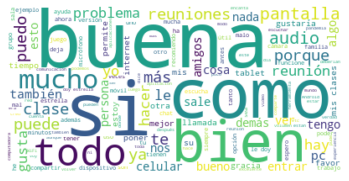

In [31]:
# Año 2021
#  Import the word cloud function  

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image 
my_cloud = WordCloud(background_color='white', stopwords= preposiciones).generate(revs_clean_21)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

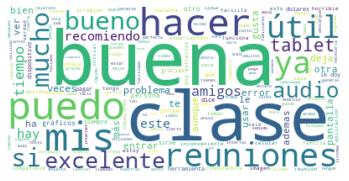

In [32]:
# Año 2022
# Import the word cloud function  

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image 
my_cloud = WordCloud(background_color='white', stopwords= preposiciones).generate(revs_clean_22)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()